In [2]:
import gradio as gr
import torch
from src.train import train
from sklearn.datasets import load_breast_cancer

In [ ]:
X, y = load_breast_cancer(return_X_y=True)
feature_names = [f"f{i}" for i in range(X.shape[1])]
model,data = train(X=X, y=y)

Target labels: [0 1]


wandb: Currently logged in as: lamastico2-0 (lamastico2-0-hes-so-valais-wallis) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


wandb: Detected [huggingface_hub.inference] in use.
wandb: Use W&B Weave for improved LLM call tracing. Install Weave with `pip install weave` then add `import weave` to the top of your script.
wandb: For more information, check out the docs at: https://weave-docs.wandb.ai/


lr: 0.001
Epoch 01 | Loss: 0.6967 | Acc: 0.4897 | Val Loss: 0.6914 | Val Acc: 0.5000
Epoch 02 | Loss: 0.6933 | Acc: 0.5220 | Val Loss: 0.6877 | Val Acc: 0.5263
Epoch 03 | Loss: 0.6899 | Acc: 0.5455 | Val Loss: 0.6840 | Val Acc: 0.5877
Epoch 04 | Loss: 0.6865 | Acc: 0.5865 | Val Loss: 0.6801 | Val Acc: 0.6140
Epoch 05 | Loss: 0.6831 | Acc: 0.6246 | Val Loss: 0.6763 | Val Acc: 0.6491
Epoch 06 | Loss: 0.6797 | Acc: 0.6862 | Val Loss: 0.6725 | Val Acc: 0.7456
Epoch 07 | Loss: 0.6765 | Acc: 0.7361 | Val Loss: 0.6689 | Val Acc: 0.7895
Epoch 08 | Loss: 0.6734 | Acc: 0.7654 | Val Loss: 0.6655 | Val Acc: 0.8246
Epoch 09 | Loss: 0.6703 | Acc: 0.8006 | Val Loss: 0.6622 | Val Acc: 0.8509
Epoch 10 | Loss: 0.6674 | Acc: 0.8387 | Val Loss: 0.6589 | Val Acc: 0.8772
Epoch 11 | Loss: 0.6646 | Acc: 0.8622 | Val Loss: 0.6557 | Val Acc: 0.8772
Epoch 12 | Loss: 0.6618 | Acc: 0.8798 | Val Loss: 0.6525 | Val Acc: 0.8860
Epoch 13 | Loss: 0.6590 | Acc: 0.8827 | Val Loss: 0.6494 | Val Acc: 0.8860
Epoch 14 | Loss

Train Accuracy,▁▂▂▃▃▅▆▆▇▇▇▇▇▇▇▇▇▇▇▇████████████████████
Train Loss,█████▇▇▇▇▇▇▇▆▆▆▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▂▂▂▁▁
Val Accuracy,▁▁▂▃▃▅▆▆▇▇▇▇▇▇██████████████████████████
Val Loss,█████▇▇▇▇▇▇▇▆▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▂▂▂▂▂▁▁
Train Accuracy,0.93548
Train Loss,0.49489
Val Accuracy,0.94737
Val Loss,0.47284


In [4]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [5]:
model.eval()
with torch.no_grad():
    y_pred_probs = model(data["X_test_tensor"])
    y_pred = (y_pred_probs > 0.5).int()

In [6]:
y_pred_np = y_pred.numpy().flatten()
y_true_np = data["y_test_tensor"].numpy().flatten()

print(classification_report(y_true_np, y_pred_np, target_names=["malignant", "benign"]))


              precision    recall  f1-score   support

   malignant       0.93      0.90      0.92        42
      benign       0.95      0.96      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



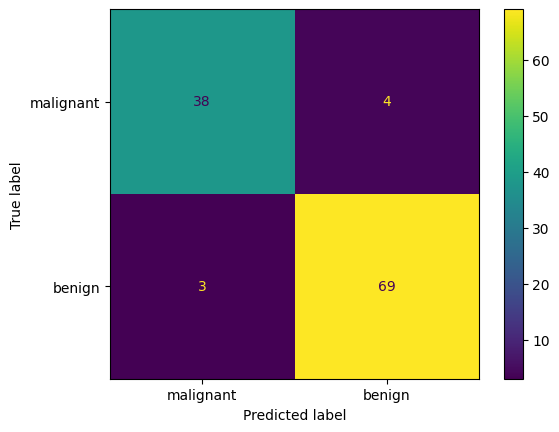

In [7]:
cm = confusion_matrix(y_true_np, y_pred_np)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["malignant", "benign"])
disp.plot()

# DEXIRE

In [17]:
from explainer.dexire import get_dexire_rules

In [20]:
rules = get_dexire_rules(model,data)

y_train unique values: [0 1]
class_names: ['malignant', 'benign']
6
feature_6
Symbolic expression: feature_6 <= 0.5
9
feature_9
Symbolic expression: feature_9 <= 0.5
Symbolic expression: feature_9 > 0.5
8
feature_8
Symbolic expression: feature_8 <= 0.5
Symbolic expression: feature_8 > 0.5
5
feature_5
Symbolic expression: feature_5 <= 0.5
Symbolic expression: feature_5 > 0.5
11
feature_11
Symbolic expression: feature_11 <= 0.5
Symbolic expression: feature_11 > 0.5
Symbolic expression: feature_6 > 0.5
14
feature_14
Symbolic expression: feature_14 <= 0.5
Symbolic expression: feature_14 > 0.5
27
X_27
Symbolic expression: X_27 <= 0.416
22
X_22
Symbolic expression: X_22 <= 0.636
26
X_26
Symbolic expression: X_26 <= 0.39
28
X_28
Symbolic expression: X_28 <= 1.76
Symbolic expression: X_28 > 1.76
Symbolic expression: X_26 > 0.39
Symbolic expression: X_22 > 0.636
Symbolic expression: X_27 > 0.416
20
X_20
Symbolic expression: X_20 <= -0.178
Symbolic expression: X_20 > -0.178
10
X_10
Symbolic expr

In [21]:
rules

[IF ((X_27 <= 0.416) AND (X_22 > 0.636)) THEN benign, IF ((X_27 <= 0.296) AND (X_12 > 0.782)) THEN benign, IF ((X_27 > 0.296) AND (X_7 > 0.276) AND (X_10 > -0.802) AND (X_12 <= -0.383)) THEN benign, IF ((X_27 <= 0.416) AND (X_22 <= 0.636) AND (X_26 > 0.39)) THEN malignant, IF ((X_27 <= 0.296) AND (X_12 <= 0.782)) THEN malignant, IF ((X_27 <= 0.416) AND (X_22 <= 0.636) AND (X_26 <= 0.39) AND (X_28 > 1.76)) THEN benign, IF ((X_27 > 0.416) AND (X_20 > -0.178) AND (X_10 > -0.818) AND (X_27 > 0.505)) THEN benign, IF ((X_27 > 0.469) AND (X_2 > -0.64) AND (X_27 > 0.505)) THEN benign, IF ((X_27 <= 0.469) AND (X_22 <= 0.636) AND (X_26 > 0.511)) THEN benign, IF ((X_27 > 0.296) AND (X_7 > 0.276) AND (X_10 <= -0.802)) THEN malignant, IF ((X_27 > 0.296) AND (X_7 > 0.276) AND (X_10 > -0.802) AND (X_12 > -0.383)) THEN benign, IF ((X_27 > 0.296) AND (X_7 <= 0.276)) THEN malignant, IF ((X_27 <= 0.416) AND (X_22 <= 0.636) AND (X_26 <= 0.39) AND (X_28 <= 1.76)) THEN malignant, IF ((X_27 > 0.416) AND (X_2

# CIU

In [67]:
from explainer.ciu import get_explainer_CIU, get_ciu_instance
import pandas as pd

In [68]:
CIU_model = get_explainer_CIU(model, data,output_names=["malignant", "benign"], feature_names=feature_names)

In [ ]:
X_test_df = pd.DataFrame(data["X_test"],  columns=feature_names)
res = get_ciu_instance(CIU_model, X_test_df.iloc[[0]])

In [ ]:
display(res)

,CI,CU,Cinfl,outname,outval,feature,ymin,ymax,inputs,invals,neutralCU,target_concept,target_inputs
0,0.024767,0.197546,-0.007491,malignant,0.314669,0,0.309776,0.334543,[0],[0.6625222613548686],0.5,None,None
1,0.071596,0.500067,0.000005,malignant,0.314669,1,0.278866,0.350462,[1],[0.1909012993477788],0.5,None,None
2,0.107360,0.406055,-0.010086,malignant,0.314669,2,0.271075,0.378435,[2],[0.7138659849173696],0.5,None,None
3,0.050833,0.490640,-0.000476,malignant,0.314669,3,0.289728,0.340561,[3],[0.5062812554499824],0.5,None,None
4,0.017997,0.400661,-0.001788,malignant,0.314669,4,0.307458,0.325455,[4],[0.13875260043374565],0.5,None,None
5,0.082193,0.514797,0.001216,malignant,0.314669,5,0.272356,0.354549,[5],[0.9714341828753871],0.5,None,None
6,0.078028,0.489002,-0.000858,malignant,0.314669,6,0.276513,0.354541,[6],[1.1362334746240965],0.5,None,None
7,0.068305,0.472750,-0.001861,malignant,0.314669,7,0.282377,0.350683,[7],[1.025074889140212],0.5,None,None
8,0.107418,0.563322,0.006802,malignant,0.314669,8,0.254158,0.361576,[8],[-0.06432461786688697],0.5,None,None
9,0.096321,0.167526,-0.032024,malignant,0.314669,9,0.298533,0.394853,[9],[0.06129580426538339],0.5,None,None


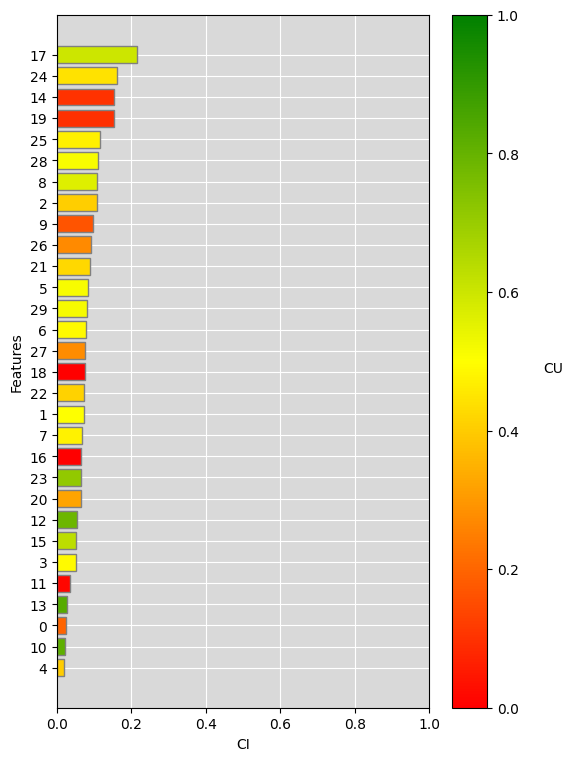

In [75]:
p = CIU_model.plot_ciu(res, figsize=(6,9))

# DEXIRE-EXO

In [22]:
from dexire_exo.ga_engine import GAEngine
from dexire_exo.rule_formatter import format_if_elif_else
from sklearn.metrics import accuracy_score, classification_report
from src.config import Config
from explainer.dexire_exo import get_dexire_exo_rules

In [56]:
best, test_acc, uncov_te, engine = get_dexire_exo_rules(feature_names, model.eval(), data)


AttributeError: 'Sequential' object has no attribute 'predict'

In [ ]:
print("\nRules in IF–ELIF–ELSE form (GA):")
print(format_if_elif_else(best, feature_names, engine.operator_set))

In [ ]:
print("\n=== FINAL GA RESULTS ===")
print(f"Fidelity (train vs model): {best.fitness.values[0]:.3f}")
print(f"# Predicates             : {best.fitness.values[1]}")
print(f"Uncovered (train)        : {best.fitness.values[2]}")
print(f"Test accuracy (matched)  : {test_acc:.3f} | Uncov test: {uncov_te}")

In [ ]:
print(f"\nBest-by-generation CSV saved as: {config.ga_params.get('log_csv', 'ga_best_by_gen.csv')}")

In [ ]:
def greet(name, intensity):
    return "Hello, " + name + "!" * int(intensity)

In [ ]:
main = gr.Interface(
    fn=greet,
    inputs=["text", "slider"],
    outputs=["text"],
    api_name="predict"
)

In [ ]:
main.launch() # add share=True to have a public server 

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
